# MBG4999 | Capstone Project 

In [39]:
import pandas as pd
import scipy.stats as stats
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [40]:
import myvariant

rs_list = ['rs762551'] 
mv = myvariant.MyVariantInfo()

for rsid in rs_list:
    result = mv.query(f'dbsnp.rsid:{rsid}', fields='dbsnp')
    allele = result['hits'][0]['dbsnp']['alleles'][0]['allele']
    freq = result['hits'][0]['dbsnp']['alleles'][0]['freq']['1000g']
    print(f"Frequency of {allele} allele for {rsid}: {freq}")

Frequency of C allele for rs762551: 0.37


In [41]:
mv = myvariant.MyVariantInfo()
result = print(mv.query('dbsnp.rsid:rs762551', fields='dbsnp'))

{'took': 9, 'total': 2, 'max_score': 16.272936, 'hits': [{'_id': 'chr15:g.75041917C>G', '_score': 16.272936, 'dbsnp': {'_license': 'http://bit.ly/2AqoLOc', 'alleles': [{'allele': 'C', 'freq': {'1000g': 0.37, 'alspac': 0.276, 'dbgap_popfreq': 0.319, 'estonian': 0.333, 'genome_dk': 0.275, 'gnomad': 0.325, 'gonl': 0.252, 'hapmap': 0.41, 'korea1k': 0.358, 'korean': 0.354, 'northernsweden': 0.257, 'page_study': 0.336, 'prjeb36033': 0.465, 'prjeb37584': 0.381, 'qatari': 0.31, 'sgdp_prj': 0.297, 'siberian': 0.174, 'tommo': 0.362, 'topmed': 0.324, 'twinsuk': 0.257, 'vietnamese': 0.286}}, {'allele': 'A', 'freq': {'1000g': 0.63, 'alspac': 0.724, 'dbgap_popfreq': 0.681, 'estonian': 0.667, 'genome_dk': 0.725, 'gnomad': 0.675, 'gonl': 0.748, 'hapmap': 0.59, 'korea1k': 0.642, 'korean': 0.646, 'northernsweden': 0.743, 'page_study': 0.664, 'prjeb36033': 0.535, 'prjeb37584': 0.619, 'qatari': 0.69, 'sgdp_prj': 0.703, 'siberian': 0.826, 'tommo': 0.638, 'topmed': 0.676, 'twinsuk': 0.743, 'vietnamese': 0.7

In [42]:
from Bio import Entrez


Entrez.email = "ugurersoz99@gmail.com"

handle = Entrez.esearch(db="snp", term="rs762551")
record = Entrez.read(handle)
id = record["IdList"][0]
handle = Entrez.efetch(db="snp", id=id, rettype="docsum")


data = None
for line in handle:
    if "ALL" in line:
        data = line.split(":")[1].strip()
        break
    elif "GLOBAL" in line:
        data = line.split(":")[1].strip()
        break

if data:
    print("rs762551 population data:", data)
else:
    print("Population data not found for rs762551.")

rs762551 population data: 74749575


## Article 1

In [43]:
df = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 1\\Article #1.xlsx")

In [44]:
df

,Sample ID,Caffeine Plasma levels (mg/L),CYP 1A2 Genotype,Metabolizer Phenotype,Coffee Drinker,Cups of coffee/day
0,0214C,39,*1F/*1A,Intermediate,yes,1 cup/day
1,0314C,1,*1A/*1A,Fast,no,none
2,0414C,67,*1A/*1A,Fast,no,none
3,0514C,16,*1A/*1A,Fast,yes,1 cup every other day
4,0614C,16,*1A/*1A,Fast,no,none
5,0714C,11,*1F/*1A,Intermediate,yes,1 cup/week
6,1114C,111,*1F/*1F,Slow,yes,1 cup/day
7,0914C,23,*1A/*1A,Fast,yes,3 cups/week
8,1014C,0,*1A/*1A,Fast,no,none
9,0814C,44,*1A/*1A,Fast,yes,1 cup/day


In [45]:
article1_df= df.loc[:,["Sample ID", "Caffeine Plasma levels (mg/L)","CYP 1A2 Genotype","Metabolizer Phenotype", "Coffee Drinker", "Cups of coffee/day"]]

article1_df.replace(["*1F/*1A","*1A/*1A","*1F/*1F"], ["AC","AA","CC"], inplace=True)
article1_df.dropna(inplace=True)
article1_df    

,Sample ID,Caffeine Plasma levels (mg/L),CYP 1A2 Genotype,Metabolizer Phenotype,Coffee Drinker,Cups of coffee/day
0,0214C,39,AC,Intermediate,yes,1 cup/day
1,0314C,1,AA,Fast,no,none
2,0414C,67,AA,Fast,no,none
3,0514C,16,AA,Fast,yes,1 cup every other day
4,0614C,16,AA,Fast,no,none
5,0714C,11,AC,Intermediate,yes,1 cup/week
6,1114C,111,CC,Slow,yes,1 cup/day
7,0914C,23,AA,Fast,yes,3 cups/week
8,1014C,0,AA,Fast,no,none
9,0814C,44,AA,Fast,yes,1 cup/day


In [46]:
print(article1_df.describe())

       Caffeine Plasma levels (mg/L)
count                      11.000000
mean                       34.181818
std                        32.987325
min                         0.000000
25%                        13.500000
50%                        23.000000
75%                        46.000000
max                       111.000000


In [47]:
# Sütunların özet istatistikleri
print(article1_df.describe())

       Caffeine Plasma levels (mg/L)
count                      11.000000
mean                       34.181818
std                        32.987325
min                         0.000000
25%                        13.500000
50%                        23.000000
75%                        46.000000
max                       111.000000


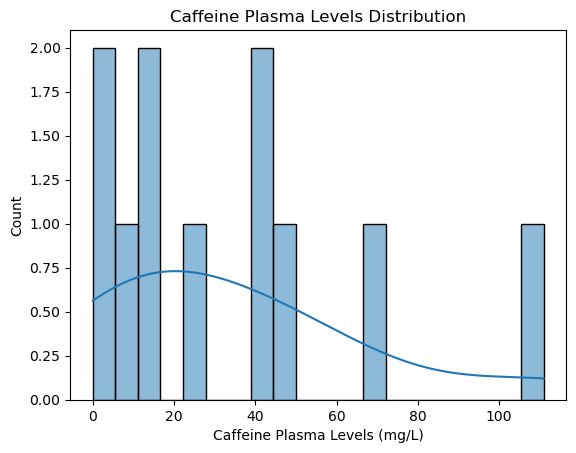

In [48]:
# kafein plazma seviyeleri dağılımı
sns.histplot(article1_df['Caffeine Plasma levels (mg/L)'], bins=20, kde=True)
plt.title('Caffeine Plasma Levels Distribution')
plt.xlabel('Caffeine Plasma Levels (mg/L)')
plt.show()

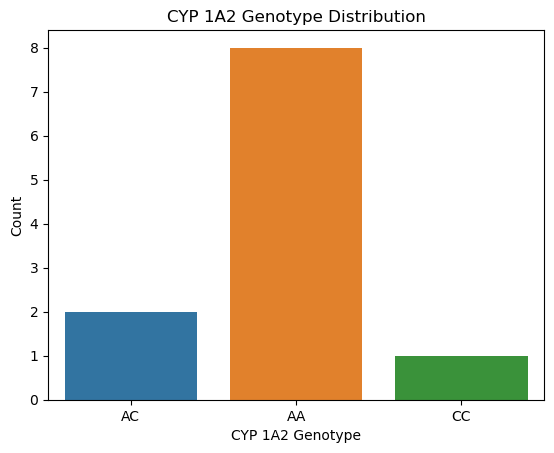

In [49]:
# CYP 1A2 genotip dağılımını gösteren bir bar grafiği çiz
sns.countplot(x='CYP 1A2 Genotype', data=article1_df)
plt.title('CYP 1A2 Genotype Distribution')
plt.xlabel('CYP 1A2 Genotype')
plt.ylabel('Count')
plt.show()

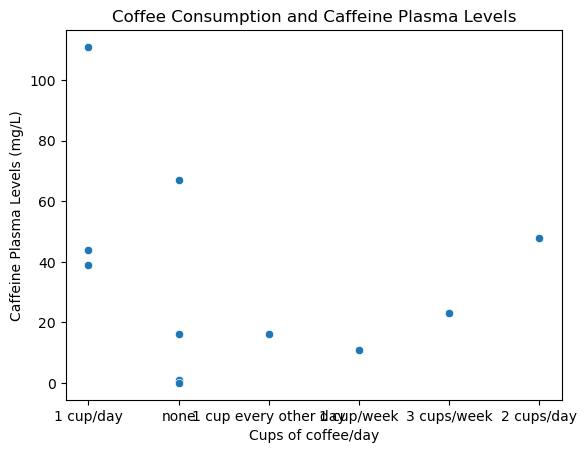

In [50]:
# Kahve tüketimi ve kafein plazma seviyeleri arasındaki ilişki
sns.scatterplot(x='Cups of coffee/day', y='Caffeine Plasma levels (mg/L)', data=article1_df)
plt.title('Coffee Consumption and Caffeine Plasma Levels')
plt.xlabel('Cups of coffee/day')
plt.ylabel('Caffeine Plasma Levels (mg/L)')
plt.show()

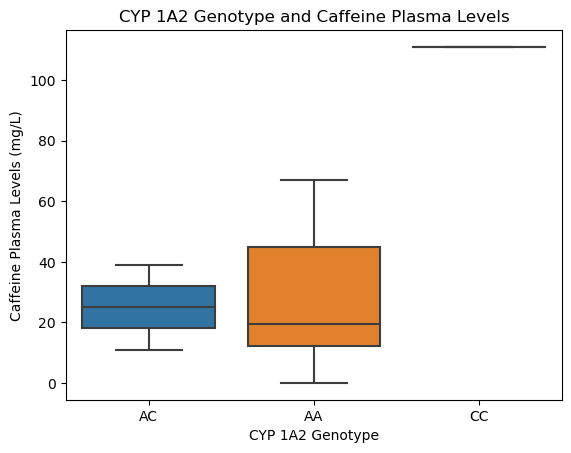

In [51]:
# CYP1A2 genotipi ve kafein plazma seviyeleri arasındaki ilişki
sns.boxplot(x='CYP 1A2 Genotype', y='Caffeine Plasma levels (mg/L)', data=article1_df)
plt.title('CYP 1A2 Genotype and Caffeine Plasma Levels')
plt.xlabel('CYP 1A2 Genotype')
plt.ylabel('Caffeine Plasma Levels (mg/L)')
plt.show()

AA    8
AC    2
CC    1
Name: CYP 1A2 Genotype, dtype: int64


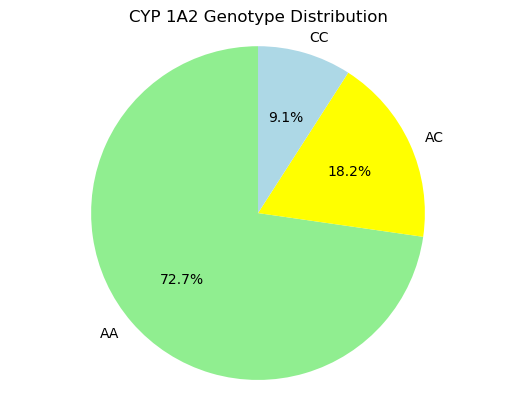

In [54]:
# CYP 1A2 genotipleri frekansı
cyp_freq = article1_df['CYP 1A2 Genotype'].value_counts()
print(cyp_freq)

# CYP 1A2 genotipi dağılımı
labels = ['AA', 'AC', 'CC']
sizes = cyp_freq.values
colors = ['lightgreen', 'yellow', 'lightblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('CYP 1A2 Genotype Distribution')
plt.axis('equal')
plt.show()

In [55]:
# CYP1A2 genotipi *1F/*1A olanların kafein plazma seviyelerinin ortalaması
mean_caffeine_1F_1A = article1_df.loc[article1_df['CYP 1A2 Genotype'] == '*1F/*1A', 'Caffeine Plasma levels (mg/L)'].mean()

print(f"The mean caffeine plasma levels of individuals with CYP1A2 genotype *1F/*1A is {mean_caffeine_1F_1A:.2f} mg/L.")

The mean caffeine plasma levels of individuals with CYP1A2 genotype *1F/*1A is nan mg/L.


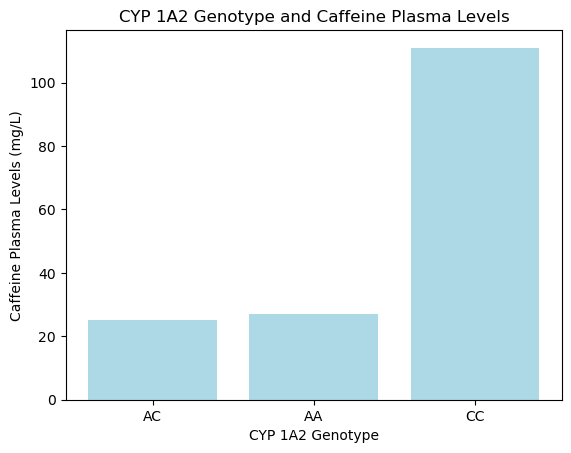

In [56]:
# CYP1A2 genotiplerine göre grupla ve kafein plazma seviyelerinin ortalaması
grouped = article1_df.groupby('CYP 1A2 Genotype')['Caffeine Plasma levels (mg/L)'].mean()

sorted_values = grouped.sort_values()

plt.bar(sorted_values.index, sorted_values.values, color = 'lightblue')
plt.title('CYP 1A2 Genotype and Caffeine Plasma Levels')
plt.xlabel('CYP 1A2 Genotype')
plt.ylabel('Caffeine Plasma Levels (mg/L)')
plt.show()

In [57]:
# CYP1A2 genotipi *1A/*1A olanların kaç tane kahve tükettinin sayısı
count_coffee_1A_1A = article1_df.loc[df['CYP 1A2 Genotype'] == '*1A/*1A', 'Cups of coffee/day'].value_counts()

print(f"The number of individuals with CYP1A2 genotype *1A/*1A who drink different amounts of coffee are:\n{count_coffee_1A_1A}")

The number of individuals with CYP1A2 genotype *1A/*1A who drink different amounts of coffee are:
none                     4
1 cup every other day    1
3 cups/week              1
1 cup/day                1
2 cups/day               1
Name: Cups of coffee/day, dtype: int64


In [58]:
from scipy.stats import ttest_ind

# CYP1A2 genotipi AA olan kişilerin günlük tüketilen kahve miktarları
coffee_AA = article1_df.loc[df["CYP 1A2 Genotype"] == "AA", "Cups of coffee/day"]

# CYP1A2 genotipi AC olan kişilerin günlük tüketilen kahve miktarları
coffee_AC = article1_df.loc[df["CYP 1A2 Genotype"] == "AC", "Cups of coffee/day"]


# İki grup arasındaki farkın anlamlılığını test et
ttest, pval = ttest_ind(coffee_AA, coffee_AC)

if pval < 0.05:
    print("CYP1A2 genotipi ile günlük tüketilen kahve miktarı arasındaki fark istatistiksel olarak anlamlıdır.")
else:
    print("CYP1A2 genotipi ile günlük tüketilen kahve miktarı arasındaki fark istatistiksel olarak anlamlı değildir.")


CYP1A2 genotipi ile günlük tüketilen kahve miktarı arasındaki fark istatistiksel olarak anlamlı değildir.


In [59]:
aa_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'AA']
ac_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'AC']
cc_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'CC']

print("Mean caffeine levels for AA genotype:", aa_genotype['Caffeine Plasma levels (mg/L)'].mean())
print("Mean caffeine levels for AC genotype:", ac_genotype['Caffeine Plasma levels (mg/L)'].mean())
print("Mean caffeine levels for CC genotype:", cc_genotype['Caffeine Plasma levels (mg/L)'].mean())


Mean caffeine levels for AA genotype: 26.875
Mean caffeine levels for AC genotype: 25.0
Mean caffeine levels for CC genotype: 111.0


In [60]:
# CYP 1A2 genotipine göre sayma
genotype_counts = article1_df["CYP 1A2 Genotype"].value_counts()

print(genotype_counts)

AA    8
AC    2
CC    1
Name: CYP 1A2 Genotype, dtype: int64


## Article 2

In [68]:
df_1 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 2\\Article #2.xlsx")

In [70]:
df_1

,Column1,Groups,Age,Body Mass (kg),BMI,Fat (%),Muscle (%)
0,NaN,Fast (n=8),22.00±1.20,67.95±6.17,22.71±1.30,19.73±4.89,34.55±2.11
1,Males,Slow (n=8),21.00±0.76,61.70±7.94,21.49±2.41,14.30±3.83,36.63±1.73
2,NaN,p value,0.062,0.141,0.292,0.036^{a},0.059
3,NaN,Fast (n=7),21.00±0.00,54.66±8.70,21.83±2.27,26.86±2.96,26.93±1.22
4,Females,Slow (n=7),21.00±0.58,56.50±8.18,21.53±2.16,27.51±2.07,26.87±0.87
5,NaN,p value,> 0.999,0.482,0.798,0.749,0.370
6,NaN,Fast (n=15),21.53±0.99,61.77±9.96,22.30±1.81,23.05±5.41,31.02±4.29
7,All,Slow (n=15),21.00±0.65,59.07±7.83,21.51±2.22,20.56±7.30,32.04±5.17
8,NaN,p value,0.174,0.436,0.345,0.389,0.653


## Article 3

In [72]:
df_2 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 3\\Article #3.xlsx")

In [73]:
df_2

,Athletes,rs762551,Branch,Caffeine metabolism\nrate (rs762551)
0,1,AA,Short distance,Rapid
1,2,AC,Short distance,Slow
2,3,AC,Short distance,Slow
3,4,AA,Short distance,Rapid
4,5,AC,Short distance,Normal
5,6,AC,Short distance,Slow
6,7,AC,Short distance,Slow
7,8,AC,Short distance,Slow
8,9,AC,Short distance,Slow
9,10,AA,Short distance,Rapid


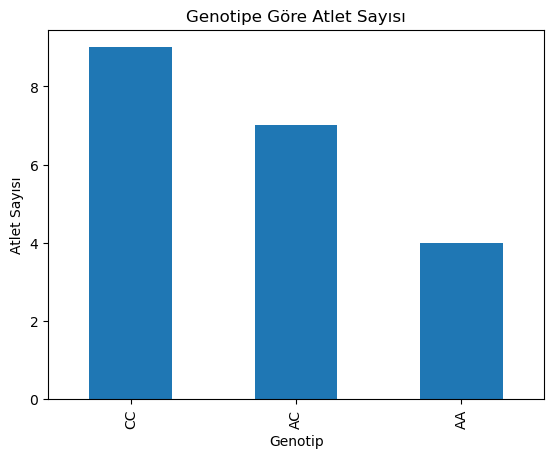

In [74]:
# Her bir genotipe karşılık gelen atlet sayısını hesaplayalım
genotype_counts = df_2['rs762551'].value_counts()

# Bar grafiği çizelim
genotype_counts.plot(kind='bar')
plt.title('Genotipe Göre Atlet Sayısı')
plt.xlabel('Genotip')
plt.ylabel('Atlet Sayısı')
plt.show()

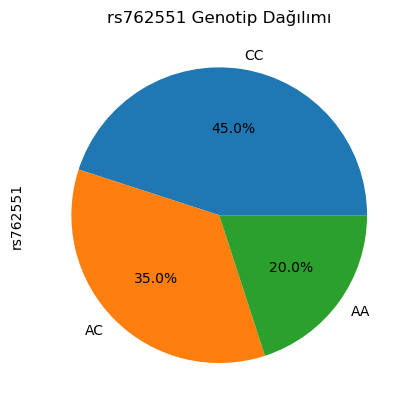

In [75]:
# Genotiplere göre atlet sayısını hesapla
genotype_counts = df_2['rs762551'].value_counts()

# Pasta grafiği oluştur
genotype_counts.plot(kind='pie', autopct='%1.1f%%')

# Grafiğe başlık ekle
plt.title('rs762551 Genotip Dağılımı')


plt.show()

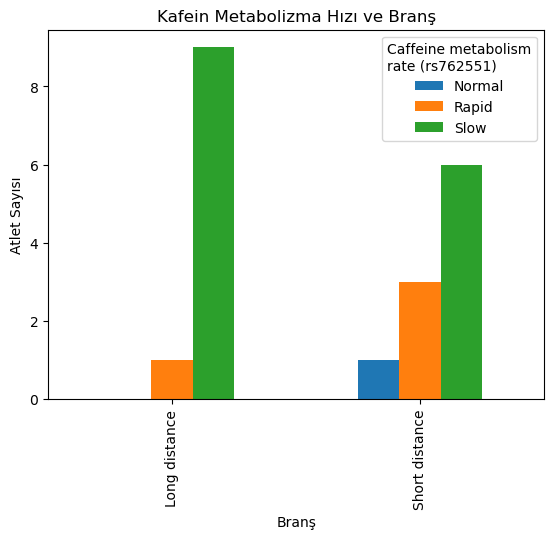

In [76]:
# Crosstab oluştur
ct = pd.crosstab(df_2['Branch'], df_2['Caffeine metabolism\nrate (rs762551)'])

# Crosstab'i çizdir
ct.plot(kind='bar')

# Grafiğe başlık ve eksikleri ekle
plt.title('Kafein Metabolizma Hızı ve Branş')
plt.xlabel('Branş')
plt.ylabel('Atlet Sayısı')

# Grafiği göster
plt.show()

In [77]:
print(df_2.describe())

       Athletes
count  20.00000
mean   10.50000
std     5.91608
min     1.00000
25%     5.75000
50%    10.50000
75%    15.25000
max    20.00000


## Article 4

In [78]:
df_3 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 4\\Article #4.xlsx")

In [80]:
df_3

,Participant,Rs762551,The Speed of Caffeine Metabolizing
0,1,AA,Rapid
1,2,AA,Rapid
2,3,AA,Rapid
3,4,AA,Rapid
4,5,AA,Rapid
5,6,AA,Rapid
6,7,AA,Rapid
7,8,AA,Rapid
8,9,AA,Rapid
9,10,AA,Rapid


In [84]:
genotypes = df_3['Rs762551']


faster_metabolism = genotypes == 'AA'
normal_metabolism = genotypes == 'AC'
slow_metabolism = genotypes == 'CC'


if any(faster_metabolism):
    print("Faster caffeine metabolism in smokers and heavy coffee consumers:")
    print(df_3.loc[faster_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(A;A) \n")

if any(normal_metabolism):
    print("Carrier of one CYP1A2*1F allele; Normal metabolism of caffeine:")
    print(df_3.loc[normal_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(A;C) \n")

if any(slow_metabolism):
    print("Normal metabolism of caffeine:")
    print(df_3.loc[slow_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(C;C) \n")

Faster caffeine metabolism in smokers and heavy coffee consumers:
    Participant Rs762551 The Speed of Caffeine Metabolizing
0             1       AA                              Rapid
1             2       AA                              Rapid
2             3       AA                              Rapid
3             4       AA                              Rapid
4             5       AA                              Rapid
5             6       AA                              Rapid
6             7       AA                              Rapid
7             8       AA                              Rapid
8             9       AA                              Rapid
9            10       AA                              Rapid
10           11       AA                              Rapid
11           12       AA                              Rapid
12           13       AA                              Rapid
https://www.snpedia.com/index.php/Rs762551(A;A) 

Carrier of one CYP1A2*1F allele; Normal meta

In [86]:
# genotip frekanslarını hesapla
genotype_counts = df_3['Rs762551'].value_counts()
genotype_frequencies = genotype_counts / genotype_counts.sum()

print(genotype_frequencies)

AA    0.433333
AC    0.300000
CC    0.266667
Name: Rs762551, dtype: float64


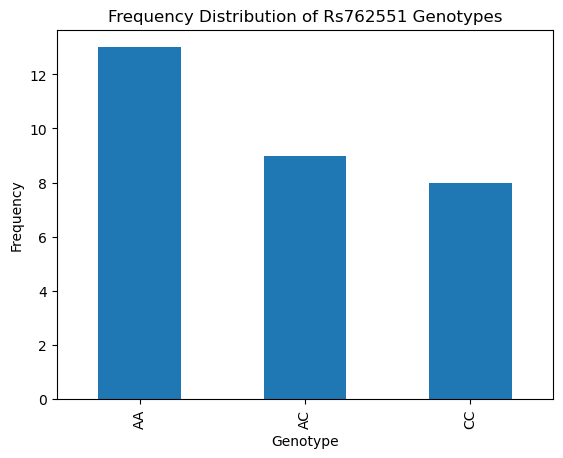

In [81]:
# frequency of each genotype
genotype_counts = df_3['Rs762551'].value_counts()

#frequency distribution
genotype_counts.plot(kind='bar')


plt.title("Frequency Distribution of Rs762551 Genotypes")
plt.xlabel("Genotype")
plt.ylabel("Frequency")

plt.show()

In [87]:
from scipy.stats import chi2_contingency

# Özet istatistikler
geno_counts = df_3['Rs762551'].value_counts()
print("Genotype counts:\n ", geno_counts)

speed_counts = df_3['Rs762551'].value_counts()
print("\nCaffeine metabolizing speed counts:\n", speed_counts)

# Genotip ve Kafein Metabolizması arasındaki ilişkiyi test etmek için ki-kare testi
contingency_table = pd.crosstab(df_3['Rs762551'], df_3['The Speed of Caffeine Metabolizing'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", pval)

Genotype counts:
  AA    13
AC     9
CC     8
Name: Rs762551, dtype: int64

Caffeine metabolizing speed counts:
 AA    13
AC     9
CC     8
Name: Rs762551, dtype: int64

Chi-square test results:
Chi-square statistic: 60.0
p-value: 2.9008631203404573e-12


In [91]:
def caffeine_metabolism(genotype):
    """Caffeine metabolism."""
    if genotype == 'AA':
        return 'Fast metabolizer'
    elif genotype == 'AC' or genotype == 'CC':
        return 'Slow metabolizer'
    else:
        return 'Unable to determine'

# Örnek bir genotip için kafein metabolizma hızını tahmin edin
genotype = 'AA'
metabolism = caffeine_metabolism(genotype)
print(f'The predicted caffeine metabolism for genotype {genotype} is: {metabolism}')

The predicted caffeine metabolism for genotype AA is: Fast metabolizer


##  1000 Genomes Project phase3

In [118]:
european_df = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Genotypes for 1000GENOMES phase_3 EUR.xlsx")

In [119]:
european_df

,Sample ID and Gender,Genotype,Populations
0,HG00096 (M),A|A,"ALL, EUR, GBR"
1,HG00099 (F),A|A,"ALL, EUR, GBR"
2,HG00100 (F),A|A,"ALL, EUR, GBR"
3,HG00102 (F),A|A,"ALL, EUR, GBR"
4,HG00103 (M),A|A,"ALL, EUR, GBR"
...,...,...,...
498,NA20803 (M),C|C,"ALL, EUR, TSI"
499,NA20808 (F),C|C,"ALL, EUR, TSI"
500,NA20814 (M),C|C,"ALL, EUR, TSI"
501,NA20821 (F),C|C,"ALL, EUR, TSI"


In [120]:
# Genotip sütunundaki A|A kombinasyonunu AA ile değiştirin
european_df['Genotype'].replace('A|A', 'AA', inplace=True)

# Genotip sütunundaki A|C kombinasyonunu AC ile değiştirin
european_df['Genotype'].replace('A|C', 'AC', inplace=True)

# Genotip sütunundaki C|C kombinasyonunu CC ile değiştirin
european_df['Genotype'].replace('C|C', 'CC', inplace=True)

# Değiştirilmiş veri setini yazdırın
print(european_df)

KeyError: 'Genotype'

In [121]:
def caffeine_metabolism(genome):
    """Caffeine metabolism."""
    assert_european(genome)
    return unphased_match(genome.rs762551, {
        "AA": "Fast metabolizer",
        "AC": "Slow metabolizer",
        "CC": "Slow metabolizer",
        None: "Unable to determine"})

In [139]:
print(european_df.head())

  Sample name and genderSample (Male/Female/Unknown)  \
0                                        HG00096 (M)   
1                                        HG00099 (F)   
2                                        HG00100 (F)   
3                                        HG00102 (F)   
4                                        HG00103 (M)   

  Genotype on the forward strandGenotype (forward strand)  \
0                                                A|A        
1                                                A|A        
2                                                A|A        
3                                                A|A        
4                                                A|A        

  Populations to which this sample belongsPopulation(s)  
0                                      ALL, EUR, GBR     
1                                      ALL, EUR, GBR     
2                                      ALL, EUR, GBR     
3                                      ALL, EUR, GBR     
4     

In [140]:
print(european_df.describe())

       Sample name and genderSample (Male/Female/Unknown)  \
count                                                 503   
unique                                                503   
top                                           HG00096 (M)   
freq                                                    1   

       Genotype on the forward strandGenotype (forward strand)  \
count                                                 503        
unique                                                  4        
top                                                   A|A        
freq                                                  239        

       Populations to which this sample belongsPopulation(s)  
count                                                 503     
unique                                                  5     
top                                         ALL, EUR, IBS     
freq                                                  107     


In [271]:
import os

path = r'C:\Users\uerso\OneDrive\Masaüstü'
file_name = 'Research1.xlsx'
file_path = os.path.join(path, file_name)

if os.path.isfile(file_path):
    print(f"{file_name} dosyası {path} dizininde mevcut.")
else:
    print(f"{file_name} dosyası {path} dizininde bulunamadı.")


Research1.xlsx dosyası C:\Users\uerso\OneDrive\Masaüstü dizininde bulunamadı.


## Article 5

In [125]:
df_4 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 5\\Article #5.xlsx")

In [126]:
df_4

,European Nationality,AA,AC,CC,Total,AA(%),AC(%),CC(%)
0,Denmark,3,0,0,3,100.00,0.00,0.00
1,Finland,6,3,2,11,54.55,27.27,18.18
2,Norway,1,2,0,3,33.33,66.67,0.00
3,Sweden,1,2,1,4,25.00,50.00,25.00
4,Armenia,1,0,0,1,100.00,0.00,0.00
5,Russia,1,0,1,2,50.00,0.00,50.00
6,Ukraine,1,1,0,2,50.00,50.00,0.00
7,Austria,0,1,0,1,0.00,100.00,0.00
8,Germany,22,39,8,69,31.88,56.52,11.59
9,Hungary,0,1,1,2,0.00,50.00,50.00


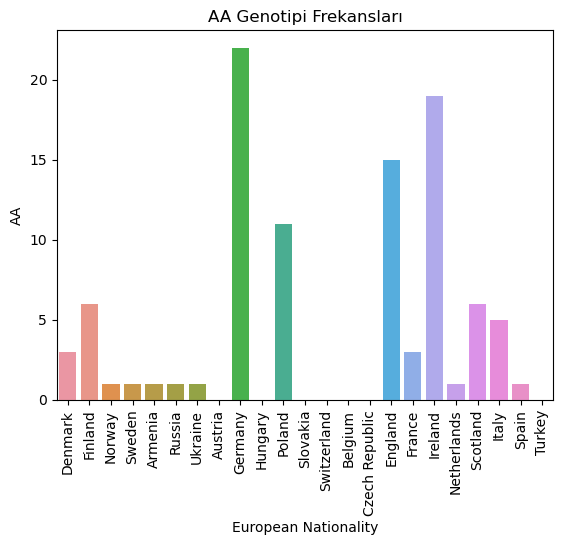

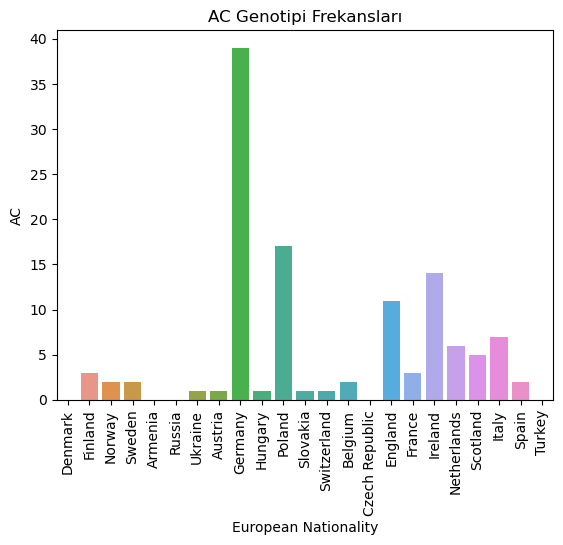

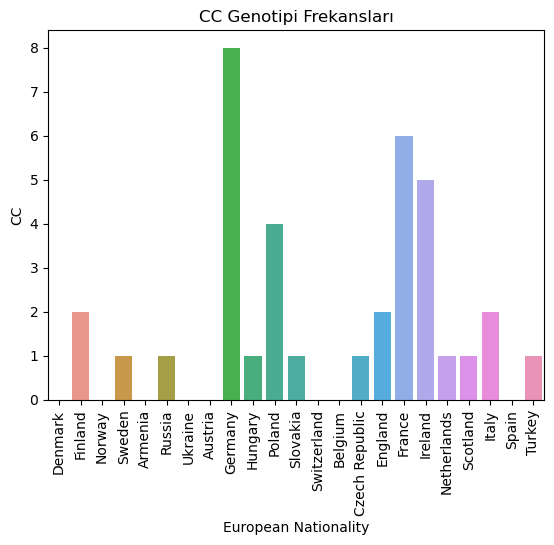

In [128]:
# AA genotipi
sns.barplot(x='European Nationality', y='AA', data=df_4)
plt.xticks(rotation=90)
plt.title('AA Genotipi Frekansları')
plt.show()

# AC genotipi 
sns.barplot(x='European Nationality', y='AC', data=df_4)
plt.xticks(rotation=90)
plt.title('AC Genotipi Frekansları')
plt.show()

# CC genotipi 
sns.barplot(x='European Nationality', y='CC', data=df_4)
plt.xticks(rotation=90)
plt.title('CC Genotipi Frekansları')
plt.show()

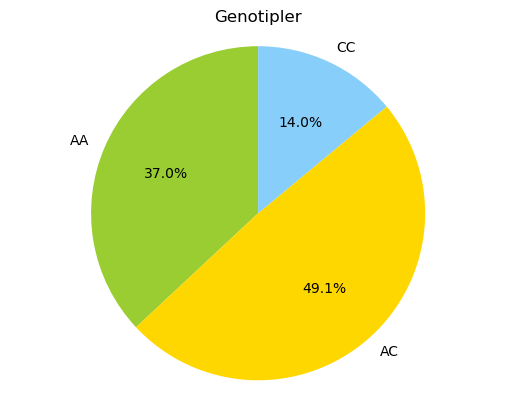

In [130]:
# AA, AC ve CC genotiplerinin yüzdelik oranları
aa_percent = df_4['AA'].sum() / df_4['Total'].sum() * 100
ac_percent = df_4['AC'].sum() / df_4['Total'].sum() * 100
cc_percent = df_4['CC'].sum() / df_4['Total'].sum() * 100


labels = ['AA', 'AC', 'CC']
sizes = [aa_percent, ac_percent, cc_percent]
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Genotipler')
plt.show()

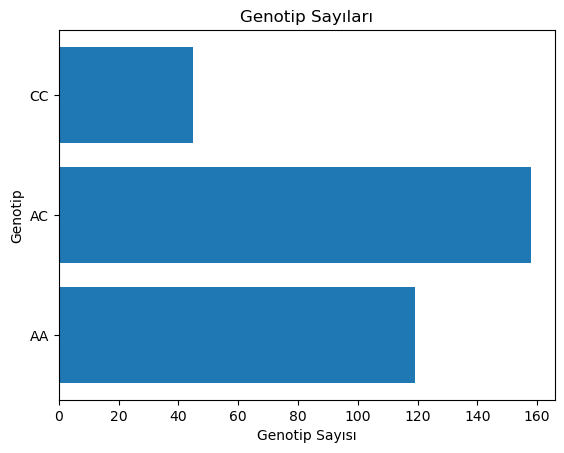

In [131]:
# AA, AC ve CC sütunlarının toplamı
genotype_counts = df_4[['AA', 'AC', 'CC']].sum()

fig, ax = plt.subplots()
ax.barh(genotype_counts.index, genotype_counts.values)

ax.set_xlabel('Genotip Sayısı')
ax.set_ylabel('Genotip')
ax.set_title('Genotip Sayıları')

plt.show()